<a href="https://colab.research.google.com/github/arnav-007/newcodingbot/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
 # checking the distribution of categorical data
 print(car_dataset.Fuel_Type.value_counts())
 print(car_dataset.Seller_Type.value_counts())
 print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Fuel_Type column

In [13]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


splitting the data into training data and test data

In [16]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [17]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=2)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


In [23]:
# linear regression
lin_reg_model = LinearRegression() 

In [24]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [25]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(x_train)

In [28]:
from sklearn import metrics
#R squared errror
score_1 = metrics.r2_score(y_train, training_data_prediction)

print("R squared error", score_1)


R squared error 0.8799451660493711


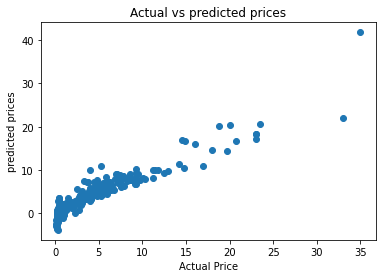

In [30]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted prices")
plt.title("Actual vs predicted prices")
plt.show()

In [31]:
test_data_prediction = lin_reg_model.predict(x_test)

In [33]:
score_1 = metrics.r2_score(y_test, test_data_prediction)

print("R squared error", score_1)

R squared error 0.8365766715027051


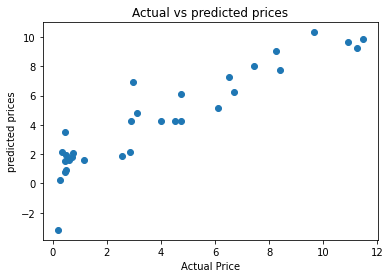

In [34]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted prices")
plt.title("Actual vs predicted prices")
plt.show()

In [38]:
#lasso regression
from sklearn.linear_model import Lasso
lass_reg_model = Lasso()

In [40]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [42]:
training_data_prediction = lass_reg_model.predict(x_train)

In [44]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

print("R squared error", score_1)

R squared error 0.8427856123435794


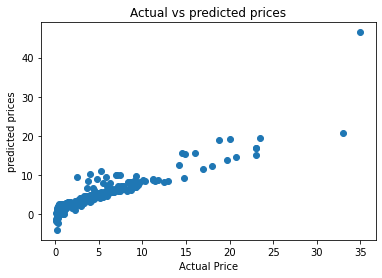

In [45]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted prices")
plt.title("Actual vs predicted prices")
plt.show()